In [11]:
from google.colab import files
uploaded = files.upload()

Saving issues.csv to issues (1).csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv('issues.csv')

# Preview data
df.head()


,id,title,created_at,closed_at,labels,comments,assignee
0,3061658902,BUG: ImportError: cannot import name 'NaN' fr...,2025-05-14 02:50:31+00:00,2025-05-14 16:19:36+00:00,"['Bug', 'Needs Triage']",1,NaN
1,3054604088,DOC: Broken Link in IO Tools - HDF5 Data Descr...,2025-05-11 00:23:23+00:00,2025-05-12 16:55:17+00:00,"['Docs', 'IO HDF5']",2,ConnorWallace15
2,3054181753,i want to develop one feature in pandas,2025-05-10 14:14:16+00:00,2025-05-10 14:31:47+00:00,"['Usage Question', 'Needs Triage']",2,NaN
3,3052183501,ENH: Add smart_groupby() method for automatic ...,2025-05-09 13:27:40+00:00,2025-05-14 18:59:15+00:00,"['Enhancement', 'Groupby', 'Closing Candidate']",3,NaN
4,3052051865,BUILD: Missing Windows free-threading wheel,2025-05-09 12:40:24+00:00,2025-05-10 14:36:30+00:00,"['Build', 'Needs Triage']",2,NaN


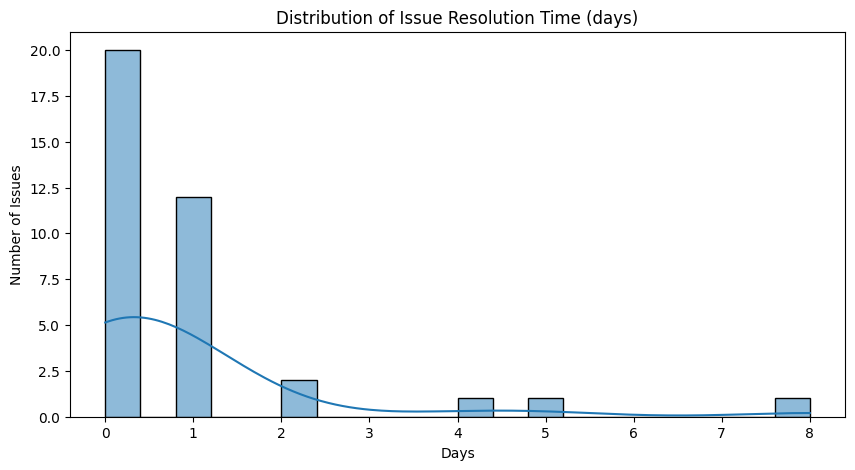

In [13]:
# Convert dates
df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Issue duration
df['duration_days'] = (df['closed_at'] - df['created_at']).dt.days

# Plot durations
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_days'], bins=20, kde=True)
plt.title("Distribution of Issue Resolution Time (days)")
plt.xlabel("Days")
plt.ylabel("Number of Issues")
plt.show()

In [14]:
# Convert label list to count
df['label_count'] = df['labels'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

# Calculate how long each issue took to close
df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['duration_days'] = (df['closed_at'] - df['created_at']).dt.days

# Is the issue assigned to someone?
df['is_assigned'] = df['assignee'].notnull().astype(int)

df[['title', 'label_count', 'duration_days', 'is_assigned']].head()


,title,label_count,duration_days,is_assigned
0,BUG: ImportError: cannot import name 'NaN' fr...,2,0,0
1,DOC: Broken Link in IO Tools - HDF5 Data Descr...,2,1,1
2,i want to develop one feature in pandas,2,0,0
3,ENH: Add smart_groupby() method for automatic ...,3,5,0
4,BUILD: Missing Windows free-threading wheel,2,1,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = df[['label_count', 'duration_days']].fillna(0)
y = df['is_assigned']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.88
